# Importing libararies & MNIST data

In [1]:
import os
import numpy as np
import struct
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline  

path = 'C:/Users/HPP/Desktop/Python/DL clas/MNIST'   # the training set is stored in this directory

# Train data
fname_train_images = os.path.join(path, 'train-images.idx3-ubyte')  # the training set image file path
fname_train_labels = os.path.join(path, 'train-labels.idx1-ubyte')  # the training set label file path

#Test data
fname_test_images = os.path.join(path, 't10k-images.idx3-ubyte')  # the training set image file path
fname_test_labels = os.path.join(path, 't10k-labels.idx1-ubyte')  # the training set label file path
    
# open the label file and load it to the "train_labels"
with open(fname_train_labels, 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    train_labels = np.fromfile(flbl, dtype=np.uint8)

# open the image file and load it to the "train_images"
with open(fname_train_images, 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    train_images = np.fromfile(fimg, dtype=np.uint8).reshape(len(train_labels), rows, cols)
    
    
with open(fname_test_labels, 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    test_labels = np.fromfile(flbl, dtype=np.uint8)

# open the image file and load it to the "train_images"
with open(fname_test_images, 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    test_images = np.fromfile(fimg, dtype=np.uint8).reshape(len(test_labels), rows, cols)
    
#print('The training set contains', len(train_images), 'images')  # print the how many images contained in the training set
print('The shape of the image is', train_images[0].shape)  # print the shape of the image

#imgNumber = 5  # choose which image you want to display
#print('The image matrix is', train_images[imgNumber])  # print the label of the image displayed


##_--------------Data Preprocessing ----------------------------------##
#Goal of this section: segregating the data into small chunks, changing the label, seperate train & test data

num_samples=20 #select the size of data for segregating

train_images_section= train_images[0:num_samples]
train_labels_section= train_labels[0:num_samples]

train_images_section=train_images_section/255    # data Normalization
#print('one instance of train image is :',train_images_section[0])

for i in range(0,num_samples): 
 if(train_labels_section[i]==3):
   train_labels_section[i]=1
 else:
   train_labels_section[i]=0

 
X_train=train_images_section
y_train= train_labels_section

print('The training set contains', len(X_train), 'images')  # print the how many images contained in the training set
print('The shape of the train image is', X_train[0].shape)  # print the shape of the image


The shape of the image is (28, 28)
The training set contains 20 images
The shape of the train image is (28, 28)


# Reshaping of data & initializing the parameters

In [3]:
m=X_train.shape[0]
print('m is:',m)
print(X_train.shape);
X_train_m=X_train.reshape(X_train.shape[1]*X_train.shape[2],X_train.shape[0])
print('shape of x train_m:',X_train_m.shape)
y_train_v=y_train.reshape(y_train.shape[0],1).T
print('shape of y_train_v:',y_train_v.shape)



#initilising the weights & bias and learnig rate
W1=np.random.randn(6,X_train.shape[1]*X_train.shape[2])
W2= np.random.randn(1,6)
b1=0
b2=0
b1=np.array(b1)
print("size of weight1 is:",W1.shape)
print("size of weight2 is:",W2.shape)
print('size of b1:',b1.shape)
alpha = 0.00041
cost=[]
iteration=[]

m is: 20
(20, 28, 28)
shape of x train_m: (784, 20)
shape of y_train_v: (1, 20)
size of weight1 is: (6, 784)
size of weight2 is: (1, 6)
size of b1: ()


# Forward propogation and back propogation 

In [7]:
for itr in range(10):
 
#Forward propogation 
 z1=np.dot(W1,X_train_m)+b1
 a1=np.maximum(z1,[0])
 
 z2=np.dot(W2,a1)+b2
 a2 = 1/(1+np.exp(-z2))
 
 J=-y_train_v*(np.log(a2))-(1-y_train_v)*np.log(1-a2) 
 J= np.sum(J)/m
 
 cost.append(J)
 iteration.append(itr)


#Backward propogation 
 dz2= a2-y_train_v
 dw2=(1/m)*np.dot(dz2,a1.T)
 db2=(1/m)*np.sum(dz2,axis=1,keepdims=True)
 
 dz1=np.dot(W2.T,dz2)*((z1>0)*1)
 dw1=(1/m)* np.dot(dz1,X_train_m.T) 
 db1= (1/m)*np.sum(dz1,axis=1,keepdims=True)
 
 W1=W1-alpha*dw1
 b1=b1-alpha*db1
 W2=W2-alpha*dw2
 b2=b2-alpha*db2
 print('size of db1:',db1.shape)
 print('size of b1:',b1.shape)
 print('size of b2:',b2.shape)

size of db1: (6, 1)
size of b1: (6, 1)
size of b2: (1, 1)
size of db1: (6, 1)
size of b1: (6, 1)
size of b2: (1, 1)
size of db1: (6, 1)
size of b1: (6, 1)
size of b2: (1, 1)
size of db1: (6, 1)
size of b1: (6, 1)
size of b2: (1, 1)
size of db1: (6, 1)
size of b1: (6, 1)
size of b2: (1, 1)
size of db1: (6, 1)
size of b1: (6, 1)
size of b2: (1, 1)
size of db1: (6, 1)
size of b1: (6, 1)
size of b2: (1, 1)
size of db1: (6, 1)
size of b1: (6, 1)
size of b2: (1, 1)
size of db1: (6, 1)
size of b1: (6, 1)
size of b2: (1, 1)
size of db1: (6, 1)
size of b1: (6, 1)
size of b2: (1, 1)


# Printing the size of matrices for cross validation 

In [403]:
print('size of W1:',W1.shape)
print('shape of dw1:',dw1.shape)
print('size of z1:',z1.shape)
print('shape of dz1:',dz1.shape)
print('size of  a1:',a1.shape)
print('shape of db1:',db1.shape)

print('\n Layer 2 size datas: \n')

print('size of W2:',W2.shape)
print('size of z2:',z2.shape)
print('size of  a2:',a2.shape)
print('shape of dz2:',dz2.shape)
print('shape of dw2:',dw2.shape)
print('shape of db2:',db2.shape)


size of W1: (6, 784)
shape of dw1: (6, 784)
size of z1: (6, 30000)
shape of dz1: (6, 30000)
size of  a1: (6, 30000)
shape of db1: (6, 1)

 Layer 2 size datas: 

size of W2: (1, 6)
size of z2: (1, 30000)
size of  a2: (1, 30000)
shape of dz2: (1, 30000)
shape of dw2: (1, 6)
shape of db2: (1, 1)


# Plot the cost function

Number of errors in training: 6316
fraction of error in training: 0.21053333333333332


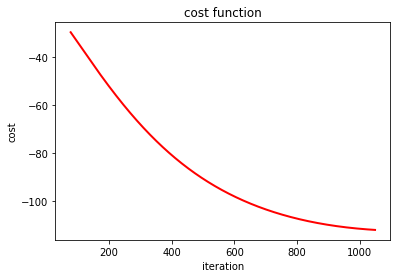

In [404]:
pyplot.title("cost function")
pyplot.xlabel("iteration")
pyplot.ylabel("cost");
pyplot.plot(iteration,cost, color='red',linewidth=2,label="J cost") 

 
#print('Output weights are:',W.T)


for i in range(a2.shape[1]):
    if(a2[0,i]<0.5):
        a2[0,i]=0
    else:
        a2[0,i]=1
c=a2-y_train_v
counter=0
for i in range(c.shape[1]):
    if c[0,i] !=0:
        counter=counter+1
print('Number of errors in training:',counter)
print('fraction of error in training:',counter/c.shape[1])    


# Testing the neural net on test data 

In [405]:
num_samplesT=2000  #select the size of data for segregating

test_images_section= test_images[0:num_samplesT]
test_labels_section= test_labels[0:num_samplesT]

test_images_section=test_images_section/255    # data Normalization


#changing label of data 
for i in range(0,num_samplesT):
 if(test_labels_section[i]==3):
   test_labels_section[i]=1
 else:
   test_labels_section[i]=0
   

#Take a piece of data from given dataset  
X_test=test_images_section
y_test= test_labels_section

print('The testing set contains', len(X_test), 'images')  # print the how many images contained in the training set
print('The shape of the test image is', X_test[0].shape)  # print the shape of the image

print('The testing set contains', len(y_test), 'labels')  # print the how many images contained in the training set


X_test_m=X_test.reshape(X_test.shape[1]*X_test.shape[2],X_test.shape[0])
print('shape of x test_m:',X_test_m.shape)
y_test_v=y_test.reshape(y_test.shape[0],1).T
print('shape of y_test_v:',y_test_v.shape)

print('size of W1:',W1.shape)
print('size of W2:',W2.shape)


Z1=np.dot(W1,X_test_m)+b1
A1=np.maximum(Z1,[0])
print('size of Z1:',Z1.shape)
print('size of A1:',A1.shape)
 
print('size of W2:',W2.shape)
Z2=np.dot(W2,A1)+b2
print('size of Z2:',Z2.shape)
A2 = 1/(1+np.exp(-Z2))

print('size of A2:',A2.shape)

for i in range(A2.shape[1]):
    if(A2[0,i]<0.5):
        A2[0,i]=0
    else:
        A2[0,i]=1
        

print('output for test sample is:',A2)
print('real input data:',y_test_v)

c=A2-y_test_v
counter=0
for i in range(c.shape[1]):
    if c[0,i] !=0:
        counter=counter+1

print('/n fraction of error in testing:',counter/c.shape[1]) 


A=A2.reshape(A2.shape[1],)
cm = confusion_matrix(y_test, A)

The testing set contains 2000 images
The shape of the test image is (28, 28)
The testing set contains 2000 labels
shape of x test_m: (784, 2000)
shape of y_test_v: (1, 2000)
size of W1: (6, 784)
size of W2: (1, 6)
size of Z1: (6, 2000)
size of A1: (6, 2000)
size of W2: (1, 6)
size of Z2: (1, 2000)
size of A2: (1, 2000)
output for test sample is: [[0. 0. 0. ... 0. 0. 0.]]
real input data: [[0 0 0 ... 1 0 0]]
/n fraction of error in testing: 0.22


# Defining  the confusion matrix

In [406]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    pyplot.imshow(cm, interpolation='nearest', cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks = np.arange(len(classes))
    pyplot.xticks(tick_marks, classes, rotation=45)
    pyplot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')
    pyplot.tight_layout()


# plotting the confusion matrix for viewing the output result

Confusion matrix, without normalization
[[1531  262]
 [ 178   29]]


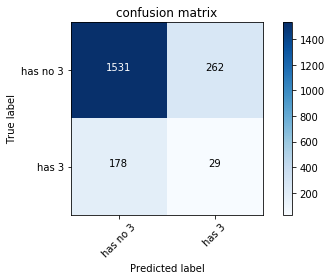

In [407]:
cm_plot_labels=['has no 3','has 3']
plot_confusion_matrix(cm,cm_plot_labels,title='confusion matrix')

The confusion matrix is reopresenting the testing error. the principal diagonal gives the correct predicted output. and rest all values give wrong prediction. Here Out of 1793 images which were not 3 ,1531 is predicted correctly. 